### ベイズ推論の線形回帰

In [1]:
using Distributions
using Plots
gr()

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1186
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


Plots.GRBackend()

In [30]:
M = 4
N = 100
x = randn(N, M)

100×4 Array{Float64,2}:
  0.988196   -0.094267   -0.944976   -0.0827821
 -0.36412     1.11906     0.147181   -0.810184 
  0.289065   -0.200758   -0.423269   -0.308036 
 -0.305916    1.35317    -0.785223    0.998781 
  0.0910801   0.0100781   1.27168     0.290911 
  0.207592    0.1762     -0.675827    1.18382  
 -0.565732   -1.50361     0.630631    0.883325 
 -2.66749    -0.296171    0.184416   -0.769395 
  1.95304     0.240243    0.242649    0.306609 
  0.16603    -1.22815    -0.215388   -0.749605 
  0.269352    0.196226   -0.252943   -0.843857 
  1.15536     0.142099    0.75465    -0.822407 
  0.755139    0.111487    0.822342    0.938584 
  ⋮                                            
 -0.0960994  -1.37862    -2.91289    -1.19614  
  2.45736    -0.351685    0.119422    0.190324 
 -0.807037    0.282057   -0.967873    0.73415  
  0.326744    0.0960574   0.568897   -0.431268 
 -0.263682    0.781086    0.596237    1.02459  
 -0.524387   -0.943032   -0.344174   -0.214464 
  1.51799    -2.

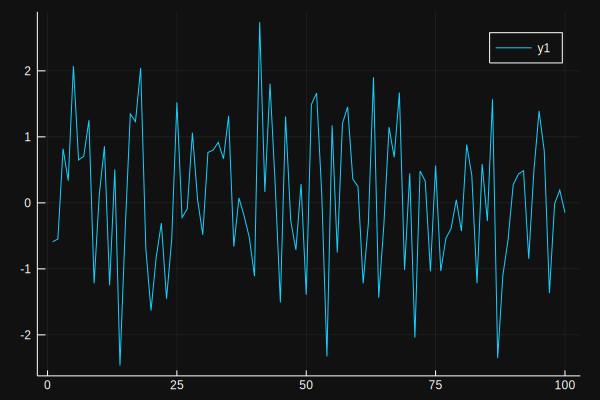

In [31]:
lambda = 1
epsilon = Normal(0, lambda^(-1))

ep = rand(epsilon, N)
plot(ep, background_color="#111111")

In [73]:
# weight
m = zeros(M)
l_lambda = zeros(M, M)

for i in 1:M
    l_lambda[i, i] = 1
end

for i in 1:M
    input = [1, x[i, 1], x[i, 2]^2, x[i, 3]^3]
    dist_w = Normal(m[i], l_lambda[i, i]^(-1))
    w = rand(dist_w, M)
    y = zeros(N)
    for j in 1:M
        y += w[j] * x[1:end, j]
    end
    plot(y, background_color="#111111")
end

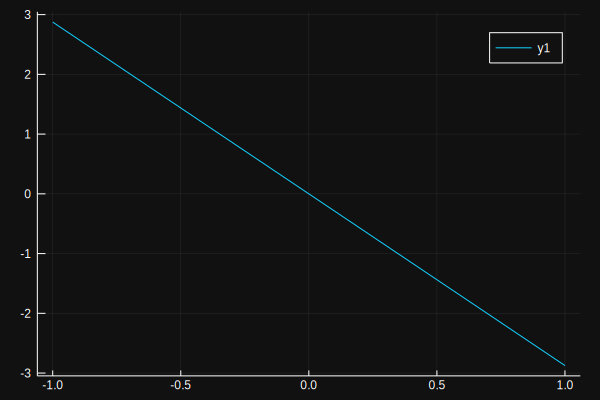

In [91]:
i = 1

r = []
for i in 1:M
    push!(r, range(-1, 1, length=100))
end

input = [1, x[i, 1], x[i, 2]^2, x[i, 3]^3]
dist_w = Normal(m[i], l_lambda[i, i]^(-1))
w = rand(dist_w, M)
y = zeros(N)
for j in 1:M
    y += w[j] * r[j]
end
plot(r[1], y, background_color="#111111")